# Défi récapitulatif : l'algorithme de Bernstein-Vazirani

Vous allez maintenant mettre en pratique tout ce que vous avez appris sur la programmation quantique en relevant le défi suivant. L'objectif est d'implémenter l'algorithme de Bernstein-Vazirani. Cet algorithme quantique permet de découvrir une chaîne binaire cachée $s$ de longueur $n$ en une seule évaluation de la fonction oracle $ f(x)$, là où un algorithme classique nécessiterait $n$ évaluations. Cet algorithme montre un avantage quantique clair pour certains problèmes de calcul.


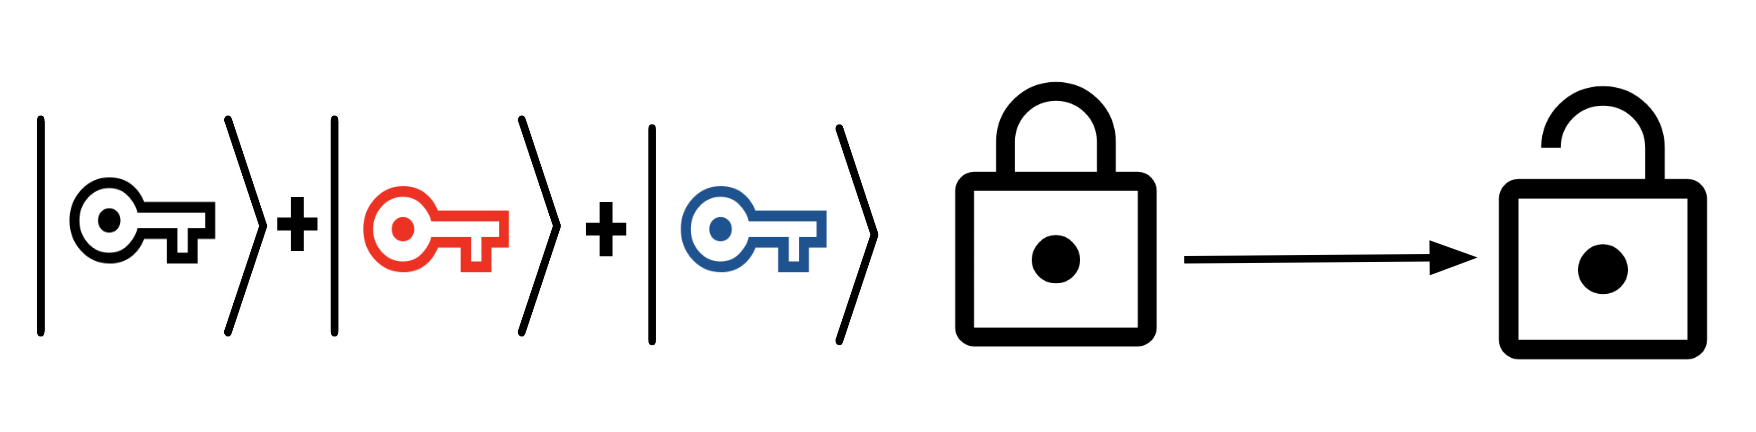

## Contexte et Problème

L'algorithme résout le problème suivant : étant donné une fonction booléenne $f(x)$ définie sur des chaînes binaires $x$ de longueur $n$, la fonction $f(x)$ est linéaire et de la forme :

\begin{align}
       f(x) = s \cdot x = s_0 x_0 \oplus s_1 x_1 \oplus \cdots \oplus s_{n-1} x_{n-1}
    \end{align}



où $ s = (s_0, s_1, \dots, s_{n-1}) $ est une chaîne binaire fixe inconnue, et $ \oplus $ représente l'addition modulo 2, le résultat est donc 0 ou 1.

\begin{align}
       1 \oplus 0 = 0 \oplus 1=1
          \end{align}

\begin{align}
       1 \oplus 1 =0 \oplus 0=0
          \end{align}


**But** : Trouver la chaîne binaire $ s $ en une seule évaluation de la fonction $ f(x) $.

## Étapes de l'algorithme

### 1. Préparation des qubits

Nous commençons avec $ n $ qubits d'entrée initialisés à l'état $ |0\rangle $ et un qubit auxiliaire initialisé à l'état $ |1\rangle $. L'état initial est donc:
\begin{align}
       |0\rangle^{\otimes n} |1\rangle   
    \end{align}


### 2. Superposition

Appliquez une porte Hadamard $ H $ à chaque qubit d'entrée. La porte Hadamard transforme un qubit dans l'état $ |0\rangle $ en une superposition égale de $ |0\rangle $ et $ |1\rangle $ :

\begin{align}
        H|0\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)    
    \end{align}


Appliquée à tous les qubits, cela produit l'état superposé suivant pour les $n $ qubits d'entrée:

\begin{align}
        \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} |x\rangle 
    \end{align}



Le qubit auxiliaire reste dans l'état $|1\rangle $, transformé en $ \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)$ par une porte Hadamard.

### 3. Application de l'oracle

L'oracle est une boîte noire qui implémente la fonction $ f(x) $. Cette fonction est telle que $ f(x) = s \cdot x $, où $ s $ est la chaîne binaire inconnue que nous voulons découvrir. L'oracle applique une porte CNOT conditionnelle à chaque qubit d'entrée en fonction de $ s $. Si le bit $ s_i $ de $ s $ est 1, alors l'oracle applique une porte CNOT contrôlée par le qubit d'entrée $ x_i $ et cible le qubit ancillaire.

L'oracle est défini par l'opération unitaire suivante :
\begin{align}
U_f|x\rangle|y\rangle=|x\rangle|y \oplus(f(x))\rangle
\end{align}
avec: 
* $|x\rangle$ l'input de l'oracle (la superposition des $x$-états)
* $|y\rangle$ le qubit ancillaire dans l'état $|-\rangle$

L'oracle inverse donc l'état du qubit ancillaire en fonction de la valeur de $ f(x)$
\begin{align}
|-\rangle=\frac{|0\rangle-|1\rangle}{\sqrt{2}}\quad\Rightarrow\quad|y\oplus f(x)\rangle=\frac{|f(x)\rangle-|1\oplus f(x)\rangle}{\sqrt{2}}
\end{align}

En effet, si $f(x)=1$ alors: 

\begin{aligned}
|f(x)\rangle=|1\rangle,\quad|1\oplus f(x)\rangle=|0\rangle 
\end{aligned}
et donc,
\begin{aligned}
\frac{|1\rangle-|0\rangle}{\sqrt{2}}=-\frac{|0\rangle-|1\rangle}{\sqrt{2}}=-|-\rangle
\end{aligned}


Ainsi, après l'application de l'oracle, l'état des qubits devient :
\begin{align}
        \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{s \cdot x} |x\rangle 
    \end{align}


Exemple d'application de l'oracle:
Soit $s=101$, l'oracle appliquera donc deux portes CNOT (une entre le 1er qubit et le qubit auxiliaire et une entre le 3e qubit et le qubit auxilaire).

L'état superposé
\begin{align}
\frac{1}{\sqrt{8}} (\vert 000 \rangle + \vert 001 \rangle + \vert 010 \rangle + \vert 011 \rangle + \vert 100 \rangle + \vert 101 \rangle + \vert 110 \rangle + \vert 111 \rangle)
\end{align}

devient alors
\begin{align}
\frac{1}{\sqrt{8}} (\vert 000 \rangle - \vert 001 \rangle + \vert 010 \rangle - \vert 011 \rangle - \vert 100 \rangle + \vert 101 \rangle - \vert 110 \rangle + \vert 111 \rangle)
\end{align}



### 4. Transformation Hadamard inverse

Appliquez à nouveau la porte Hadamard à chaque qubit d'entrée. Cette opération inverse la transformation Hadamard initiale et "concentre" la superposition sur un seul état binaire, qui correspond à la chaîne $ s $.

Après l'application de cette transformation, l'état des qubits d'entrée est directement $|s\rangle $.

### 5. Mesure

Mesurez les $n $ qubits d'entrée. Le résultat de la mesure sera la chaîne binaire $ s $, que vous cherchiez.



# EXERCICE

---

Dans cet exercice, nous allons implémenter et exécuter l’algorithme de Bernstein-Vazirani. Cet algorithme permet de retrouver une chaîne binaire secrète $s$ en un seul appel à un oracle quantique. Nous allons d'abord coder l'algorithme, le tester en simulation, puis l'exécuter sur MonarQ.

### 1. Implémentation de la fonction Bernstein-Vazirani
La première étape consiste à écrire une fonction qui implémente les différentes étapes de l’algorithme :  

1. **Initialisation et superposition** : appliquer des portes Hadamard pour préparer les états des qubits.  
2. **Préparation de l'oracle** : convertir la chaîne binaire secrète $s$ en une séquence de portes CNOT.  
3. **Transformation Hadamard finale** : appliquer des portes Hadamard pour révéler $s$.  

Complétez la fonction `bernstein_vazirani(s)`, qui prend une chaîne binaire $s$ en entrée et applique les opérations nécessaires.  

In [ ]:
import pennylane as qml
import matplotlib.pyplot as plt

In [ ]:
def bernstein_vazirani(s):
    """
    Implémente les quatre premières étapes de l'algorithme de Bernstein-Vazirani.

    Paramètres :
    s (str) : La chaîne binaire secrète à déterminer.

    Cette fonction applique les étapes 1 à 4 décrites ci-haut.
    """
    n_qubits = len(s)

    # Étape 1-2 : Initialisation et création de superposition

    # Étape 3 : Application de l'oracle

    # Étape 4 : Transformation de Hadamard sur les qubits d'entrée
     


### 2. Exécution en simulation
Une fois la fonction implémentée, nous allons la tester sur un simulateur quantique.  

- Configurez un simulateur avec `qml.device("default.qubit")`.  
- Exécutez 1000 tires ('shots') et observez la distribution des résultats.  

L’objectif est de vérifier que la sortie est bien la chaîne  $s$.  

In [ ]:
# Définir la chaîne binaire secrète
s = '001'
n_qubits = len(s)  # Nombre de qubits nécessaires pour encoder `s`

# Définir un simulateur quantique avec `default.qubit`
dev = qml.device("default.qubit", wires=n_qubits + 1, shots=1000)

@qml.qnode(dev)
def algorithm():
    """
    Exécute l'algorithme de Bernstein-Vazirani et mesure les qubits d'entrée.

    Retourne :
        dict : Résultats des mesures sous forme d'un compte des états observés.
    """
    
    bernstein_vazirani(s)  # Appliquer l'algorithme

    # Étape 5 : Mesurer les `n_qubits` d'entrée.
    # Cette mesure doit être compatible avec l'implémentation sur MonarQ.
    return #Votre code ici

# Exécuter l'algorithme et afficher le résultat
result = algorithm()
print(result)

# labels = list(result.keys())
# values = list(result.values())

# plt.figure(figsize=(10, 5))
# plt.bar(labels, values)
# plt.xlabel('Bit String Result')
# plt.ylabel('Counts')
# plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.tight_layout()
# plt.show()


### 3. Exécution sur MonarQ
Enfin, nous allons exécuter l’algorithme sur MonarQ.

- Configurer l'accès à MonarQ.
- Définir le `device` afin d'utiliser MonarQ.

Les résultats devraient être similaires, mais il peut y avoir des différences dues aux bruits du matériel quantique.

In [ ]:
from pennylane_calculquebec.API.client import MonarqClient

#Définir un client MonarQ pour envoyer la tâche sur MonarQ
my_client = MonarqClient("https://monarq.calculquebec.ca", "your username", "your token")

from pennylane_calculquebec.processing.config import MonarqDefaultConfig, NoPlaceNoRouteConfig, ProcessingConfig, PrintDefaultConfig, PrintNoPlaceNoRouteConfig
from pennylane_calculquebec.processing.interfaces import PreProcStep, PostProcStep
from pennylane_calculquebec.processing.steps import IBUReadoutMitigation, MatrixReadoutMitigation

config = PrintDefaultConfig(False)

# Définir la chaîne binaire secrète
s = '001'
n_qubits = len(s)  # Nombre de qubits nécessaires pour encoder `s`


dev = qml.device("monarq.default", client = my_client, wires = n_qubits+1, shots = 1000, processing_config = config)

@qml.qnode(dev)
def algorithm():
    """
    Exécute l'algorithme de Bernstein-Vazirani et mesure les qubits d'entrée.

    Retourne :
        dict : Résultats des mesures sous forme d'un compte des états observés.
    """
    
    bernstein_vazirani(s)  # Appliquer l'algorithme

    # Étape 5 : Mesurer les `n_qubits` d'entrée.
    # Cette mesure doit être compatible avec l'implémentation sur MonarQ.
    return #votre code ici
    
result = algorithm()
print(result)

In [ ]:
labels = list(result.keys())
values = list(result.values())

plt.figure(figsize=(10, 5))
plt.bar(labels, values)
plt.xlabel('Bit String Result')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()